In [3]:
# import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#read file data
df = pd.read_csv('penguins.csv')

In [152]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [190]:
species_count= df['species'].value_counts()
print(species_count)

island_count= df['island'].value_counts()
print(island_count)

sex_count= df['sex'].value_counts()
print(sex_count)

year_count= df['year'].value_counts()
print(year_count)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
male      168
female    165
Name: count, dtype: int64
year
2009    120
2008    114
2007    110
Name: count, dtype: int64


In [258]:
#Task 2
df1 = df.iloc[:,3:7]
df1 = df1.fillna(df1.mean())
df1.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000


In [455]:
#Compute the mean for each attribute in the dataset:
x1 = df1.iloc[:,0]
bill_len_mean = x1.mean()
print("Bill length Mean: ", bill_len_mean)

y1 = df1.iloc[:,1]
bill_dep_mean = y1.mean()
print("Bill Depth Mean: ", bill_dep_mean)

z1 = df1.iloc[:,2]
flipper_len_mean = z1.mean()
print("Flipper length Mean:", flipper_len_mean)

q1 = df1.iloc[:,3]
body_mass_mean = q1.mean()
print("Body Mass Mean: ", body_mass_mean)


# Proper way
print()
mean = df1.mean()
print(mean)

Bill length Mean:  43.92192982456141
Bill Depth Mean:  17.151169590643274
Flipper length Mean: 200.91520467836258
Body Mass Mean:  4201.754385964912

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64


In [50]:
# Compute Covariance Matrix (Outer)
data = df1.to_numpy() # converts data to numpy
data_centered = data-np.mean(data,axis=0)
cov_matrix = 1/data.shape[0]*np.dot(data_centered.T,data_centered)
print(cov_matrix)

[[ 2.95471091e+01 -2.51213306e+00  4.99364418e+01  2.58286873e+03]
 [-2.51213306e+00  3.86579806e+00 -1.60715584e+01 -7.40852331e+02]
 [ 4.99364418e+01 -1.60715584e+01  1.96007386e+02  9.73873802e+03]
 [ 2.58286873e+03 -7.40852331e+02  9.73873802e+03  6.37522376e+05]]


In [440]:
# Compute Covariance Matrix (Inner)
center = df1 - mean
cov_matrix_inner = np.cov(center, rowvar=False)

print(cov_matrix_inner)

[[ 2.96332523e+01 -2.51945706e+00  5.00820291e+01  2.59039896e+03]
 [-2.51945706e+00  3.87706861e+00 -1.61184142e+01 -7.43012250e+02]
 [ 5.00820291e+01 -1.61184142e+01  1.96578837e+02  9.76713084e+03]
 [ 2.59039896e+03 -7.43012250e+02  9.76713084e+03  6.39381042e+05]]


In [116]:
# Correlation Between Two Attributes(bill_length_mm, bill_depth_mm)
corr = df1.iloc[:,0:2]
print(corr.corr())

correlation = df['bill_length_mm'].corr(df['bill_depth_mm'])
print('Correlation: ',correlation)

                bill_length_mm  bill_depth_mm
bill_length_mm        1.000000      -0.235053
bill_depth_mm        -0.235053       1.000000
Correlation:  -0.23505287035553274


In [322]:
#Compute the correlation between the two attributes(bill_length_mm, bill_depth_mm) by calculating the cosine of the angle between the centered attribute vectors. Include a scatter plot of these two attributes.

bill_len_centered = x1 - bill_len_mean
bill_dep_centered = y1 - bill_dep_mean
dot_product = np.dot(bill_len_centered, bill_dep_centered)

norm1 = np.linalg.norm(bill_len_centered)
norm2 = np.linalg.norm(bill_dep_centered)

corr = dot_product/ (norm1 * norm2)
print(corr)

-0.23505287035553277


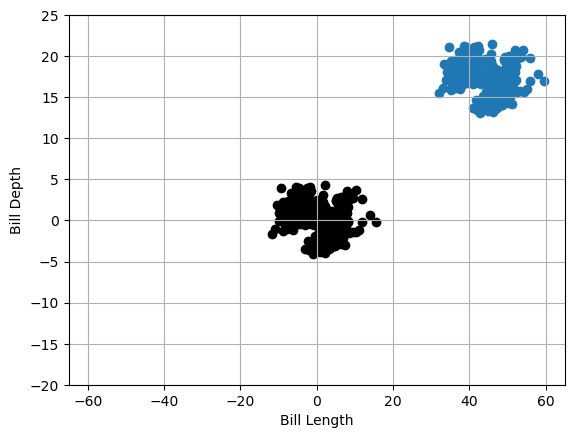

In [390]:
#Scatter Plot
x = df1.iloc[:,0]
y = df1.iloc[:,1]
x2 = x1 - x1.mean()
y2 = y1 - y1.mean()
plt.scatter(x,y)
plt.scatter(x2,y2,color = 'black')
plt.xlabel("Bill Length")
plt.ylabel("Bill Depth")
plt.xlim(-65,65)
plt.ylim(-20,25)
plt.grid()

In [457]:
#Compute the Covariance matrix of the three categorical attributes(species, island, and sex).
n = df.shape[0]

In [192]:
species_count = species_count.to_numpy()
print(species_count)

[152 124  68]


In [226]:
p1 = (species_count/n)
print(p1)

[0.44186047 0.36046512 0.19767442]


In [246]:
cov_matrix1 = np.diag(p1)-np.dot(p1.T,p1)
print(cov_matrix1)

[[ 0.07760952 -0.36425095 -0.36425095]
 [-0.36425095 -0.00378583 -0.36425095]
 [-0.36425095 -0.36425095 -0.16657653]]


In [202]:
island_count = island_count.to_numpy()
print(island_count)

[168 124  52]


In [236]:
p2 = (island_count/n)
print(p2)

[0.48837209 0.36046512 0.15116279]


In [248]:
cov_matrix2 = np.diag(p2)-np.dot(p2.T,p2)
print(cov_matrix2)

[[ 0.0970795  -0.39129259 -0.39129259]
 [-0.39129259 -0.03082747 -0.39129259]
 [-0.39129259 -0.39129259 -0.2401298 ]]


In [240]:
sex_count = sex_count.to_numpy()
print(sex_count)

[168 165]


In [242]:
p3 = (sex_count/n)
print(p3)

[0.48837209 0.47965116]


In [250]:
cov_matrix3 = np.diag(p3)-np.dot(p3.T,p3)
print(cov_matrix3)

[[ 0.01979955 -0.46857254]
 [-0.46857254  0.01107862]]


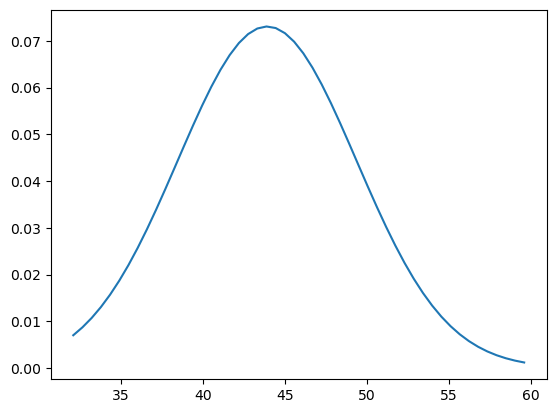

In [420]:
#Probability Density Function: Assuming the first numerical attribute is normally distributed, plot its probability density function.
#(Bill Length)
a = df['bill_length_mm'].mean()

b = df['bill_length_mm'].std()

x = np.linspace(min(df['bill_length_mm']), max(df['bill_length_mm']))

pdf = (1 / (b * np.sqrt(2 * np.pi))) * np.exp(-((x - a) ** 2) / (2 * b ** 2))

plt.plot(x, pdf)


In [432]:
#Variance Analysis: Identify the numerical attribute with the largest variance and the one with the smallest variance. Print these values.
vars = df1.var()
print(vars)

bill_length_mm           29.633252
bill_depth_mm             3.877069
flipper_length_mm       196.578837
body_mass_g          639381.041890
dtype: float64


In [430]:
print('Highest Variance: 639381.041890')
print('Lowest Variance: 3.877069')


Highest Variance: 639381.041890
Lowest Variance: 3.877069


In [449]:

# Highest + lowest covariance 
covariance_masked = np.copy(cov_matrix_inner)
np.fill_diagonal(covariance_masked, np.nan)
# Largest + Smallest
largest_covariance_index = np.unravel_index(np.nanargmax(covariance_masked), covariance_masked.shape)
smallest_covariance_index = np.unravel_index(np.nanargmin(covariance_masked), covariance_masked.shape)

# Get Names
largest_covariance_attributes = (df1.columns[largest_covariance_index[0]], df1.columns[largest_covariance_index[1]])
smallest_covariance_attributes = (df1.columns[smallest_covariance_index[0]], df1.columns[smallest_covariance_index[1]])
largest_covariance_value = covariance_masked[largest_covariance_index]
smallest_covariance_value = covariance_masked[smallest_covariance_index]

#Print
print('Largest Covariance Pair:',largest_covariance_attributes, largest_covariance_value)
print('Smallest Covariance Pair: ',smallest_covariance_attributes, smallest_covariance_value)

Largest Covariance Pair: ('flipper_length_mm', 'body_mass_g') 9767.130837297325
Smallest Covariance Pair:  ('bill_depth_mm', 'body_mass_g') -743.0122500127871
